In [4]:
import tensorflow as tf
from mlxtend.plotting import plot_confusion_matrix
from sklearn import metrics
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")


In [5]:
vocab_size = 10000
max_len = 200
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.imdb.load_data(num_words=vocab_size)


In [6]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape
x_train = tf.keras.preprocessing.sequence.pad_sequences(x_train, maxlen=max_len)
x_test = tf.keras.preprocessing.sequence.pad_sequences(x_test, maxlen=max_len)

In [7]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, 128, input_length=max_len),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [8]:
model.summary()
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding (Embedding)                │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [9]:
history = model.fit(x_train, y_train, batch_size=128, epochs=5, validation_data=(x_test, y_test))

Epoch 1/5
196/196 ━━━━━━━━━━━━━━━━━━━━ 31s 121ms/step - accuracy: 0.6777 - loss: 0.5521 - val_accuracy: 0.8680 - val_loss: 0.3082
Epoch 2/5
196/196 ━━━━━━━━━━━━━━━━━━━━ 23s 119ms/step - accuracy: 0.9622 - loss: 0.1113 - val_accuracy: 0.8404 - val_loss: 0.4179
Epoch 3/5
196/196 ━━━━━━━━━━━━━━━━━━━━ 24s 123ms/step - accuracy: 0.9971 - loss: 0.0148 - val_accuracy: 0.8454 - val_loss: 0.4961
Epoch 4/5
196/196 ━━━━━━━━━━━━━━━━━━━━ 24s 121ms/step - accuracy: 0.9998 - loss: 0.0024 - val_accuracy: 0.8520 - val_loss: 0.5207
Epoch 5/5
196/196 ━━━━━━━━━━━━━━━━━━━━ 24s 121ms/step - accuracy: 1.0000 - loss: 5.5691e-04 - val_accuracy: 0.8538 - val_loss: 0.5396


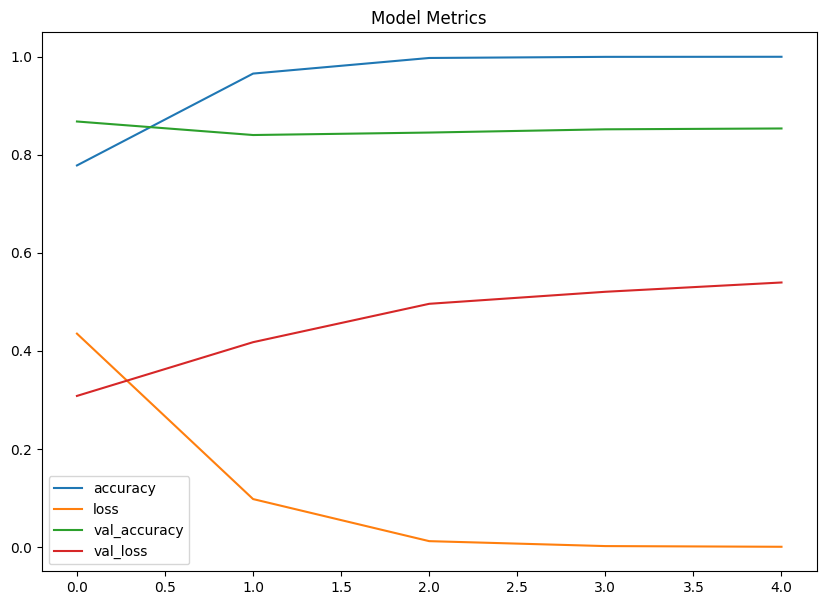

In [10]:
pd.DataFrame(history.history).plot(figsize=(10,7))
plt.title("Model Metrics")
plt.show()

In [11]:
loss, accuracy = model.evaluate(x_test, y_test)
print("Test Accuracy:", accuracy)


782/782 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.8536 - loss: 0.5424
Test Accuracy: 0.8537600040435791


In [12]:
y_pred = model.predict(x_test)
y_pred = y_pred.flatten()
y_pred = (y_pred > 0.5).astype(int)
print(metrics.classification_report(y_test, y_pred))


782/782 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step
              precision    recall  f1-score   support

           0       0.86      0.85      0.85     12500
           1       0.85      0.86      0.85     12500

    accuracy                           0.85     25000
   macro avg       0.85      0.85      0.85     25000
weighted avg       0.85      0.85      0.85     25000



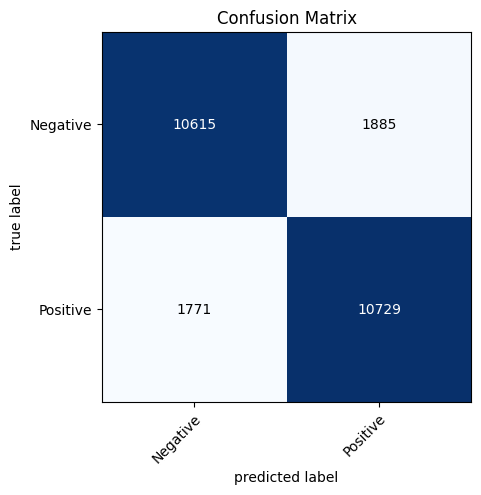

In [13]:
cm = metrics.confusion_matrix(y_test, y_pred)
plot_confusion_matrix(cm, class_names=['Negative', 'Positive'])
plt.title("Confusion Matrix")
plt.show()
